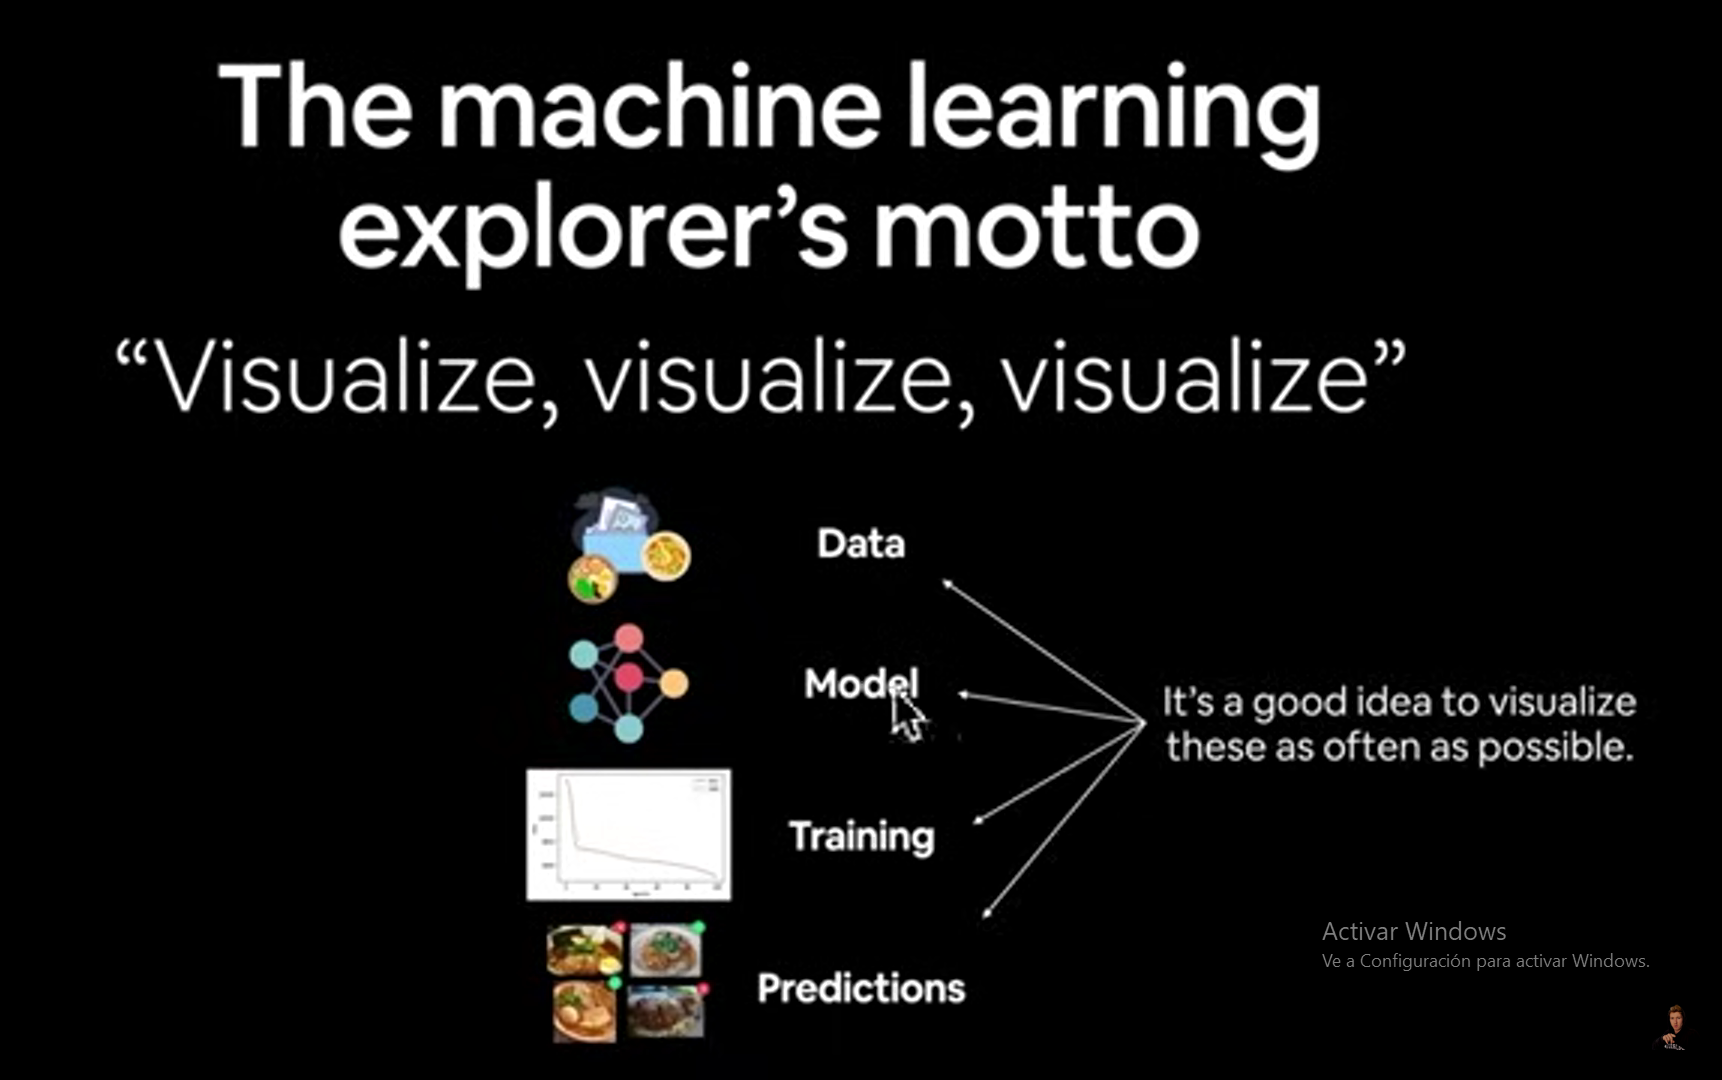

"Experunent, experiment, experiment"

"Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> ..."

1. Get more data - More examples for the model to train on (More opportunities to learn patterns or relationships between features and labels).
2. Make the model larger (Complex) - More layers or more hidden units in each layer.
3. Train for longer - More epochs.


In [1]:
import tensorflow as tf

X = tf.range(-100,100,5)
X

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95], dtype=int32)>

In [2]:
y = X*3
y

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-300, -285, -270, -255, -240, -225, -210, -195, -180, -165, -150,
       -135, -120, -105,  -90,  -75,  -60,  -45,  -30,  -15,    0,   15,
         30,   45,   60,   75,   90,  105,  120,  135,  150,  165,  180,
        195,  210,  225,  240,  255,  270,  285], dtype=int32)>

In [3]:
# Convert to tensors
X = tf.reshape(X, (-1, 1))  # Reshape to make it a column vector
y = tf.reshape(y, (-1, 1))

# Calculate the sizes for train, validation, and test sets
train_size = int(0.6 * len(X))
val_size = int(0.2 * len(X))

# Split the dataset
X_train, X_val, X_test = tf.split(X, [train_size, val_size, len(X) - train_size - val_size])
y_train, y_val, y_test = tf.split(y, [train_size, val_size, len(y) - train_size - val_size])

# Check the shapes of the tensors
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24, 1)
X_val shape: (8, 1)
X_test shape: (8, 1)
y_train shape: (24, 1)
y_val shape: (8, 1)
y_test shape: (8, 1)


3 modelling experinents:
1. model_1 - Same as the original model, 1 hidden layer with 200 of hidden units and trained for 200 epochs.
2. model_2 - 2 hidden layers with 100 of hidden_units for each layer and trained for 200 epochs.
3. model_3 - 2 hidden layers with 100 of hidden_units for each layer and trained for 500 epochs.

#Model_1

In [5]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))  # The input layer
model.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 385ms/step - loss: 129.6295 - mae: 129.6295
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 93.0305 - mae: 93.0305
Epoch 3/200
1/1 [==============================] - 0s 20ms/step - loss: 40.5311 - mae: 40.5311
Epoch 4/200
1/1 [==============================] - 0s 21ms/step - loss: 68.3649 - mae: 68.3649
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 72.8684 - mae: 72.8684
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 5.9478 - mae: 5.9478
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 137.5892 - mae: 137.5892
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 50.3395 - mae: 50.3395
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 45.6049 - mae: 45.6049
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 79.3291 - mae: 79.3291
Epoch 11/200
1/1 [============================

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               400       
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.predict([100])

1/1 [==============================] - 0s 103ms/step


array([[294.7922]], dtype=float32)

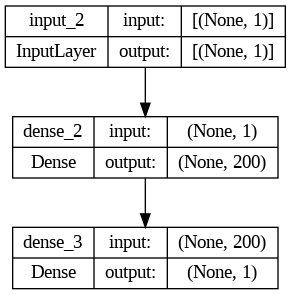

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [9]:
def huber_loss(y_true, y_pred, max_grad=1.):
    """Calculates the huber loss.

    Parameters
    ----------
    y_true: np.array, tf.Tensor
      Target value.
    y_pred: np.array, tf.Tensor
      Predicted value.
    max_grad: float, optional
      Positive floating point value. Represents the maximum possible
      gradient magnitude.

    Returns
    -------
    tf.Tensor
      The huber loss.
    """
    err = tf.abs(y_true - y_pred, name='abs')
    mg = tf.constant(max_grad, name='max_grad')
    lin = mg*(err-.5*mg)
    quad=.5*err*err
    return tf.where(err < mg, quad, lin)

In [10]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)

def huber(y_true, y_pred):
  return tf.reduce_mean(huber_loss(y_true, y_pred))

In [60]:
y_val_pred1 = model.predict(X_val)
y_pred_pred1 = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [61]:
y_val_pred1_tensor = tf.squeeze(tf.constant(y_val_pred1))
y_pred_pred1_tensor = tf.squeeze(tf.constant(y_pred_pred1))
y_val_tensor = tf.squeeze(y_val)
y_test_tensor = tf.squeeze(y_test)

y_val_tensor = tf.cast(y_val_tensor, dtype=tf.float32)
y_test_tensor = tf.cast(y_test_tensor, dtype=tf.float32)

MAE:

In [62]:
print(mae(y_val_tensor, y_val_pred1_tensor))
print(mae(y_test_tensor, y_pred_pred1_tensor))

tf.Tensor(1.9617052, shape=(), dtype=float32)
tf.Tensor(4.0391674, shape=(), dtype=float32)


In [63]:
mae_val_1 = mae(y_val_tensor, y_val_pred1_tensor)
mae_test_1 = mae(y_test_tensor, y_pred_pred1_tensor)

MSE:

In [64]:
print(mse(y_val_tensor, y_val_pred1_tensor))
print(mse(y_test_tensor, y_pred_pred1_tensor))

tf.Tensor(4.2022753, shape=(), dtype=float32)
tf.Tensor(16.668978, shape=(), dtype=float32)


In [65]:
mse_val_1 = mse(y_val_tensor, y_val_pred1_tensor)
mse_test_1 = mse(y_test_tensor, y_pred_pred1_tensor)

Huber:

In [15]:
print(huber(y_val_tensor, y_val_pred1_tensor))
print(huber(y_test_tensor, y_pred_pred1_tensor))

tf.Tensor(1.4617052, shape=(), dtype=float32)
tf.Tensor(3.5391674, shape=(), dtype=float32)


In [66]:
huber_val_1 = huber(y_val_tensor, y_val_pred1_tensor)
huber_test_1 = huber(y_test_tensor, y_pred_pred1_tensor)

In [18]:
import matplotlib.pyplot as plt

def plot_predictions_data(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred_pred1):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  plt.scatter(test_data, test_labels, c='r', label="Testing data")
  plt.scatter(test_data, predictions, c='g', label="Predictions")
  plt.legend()
  plt.show()

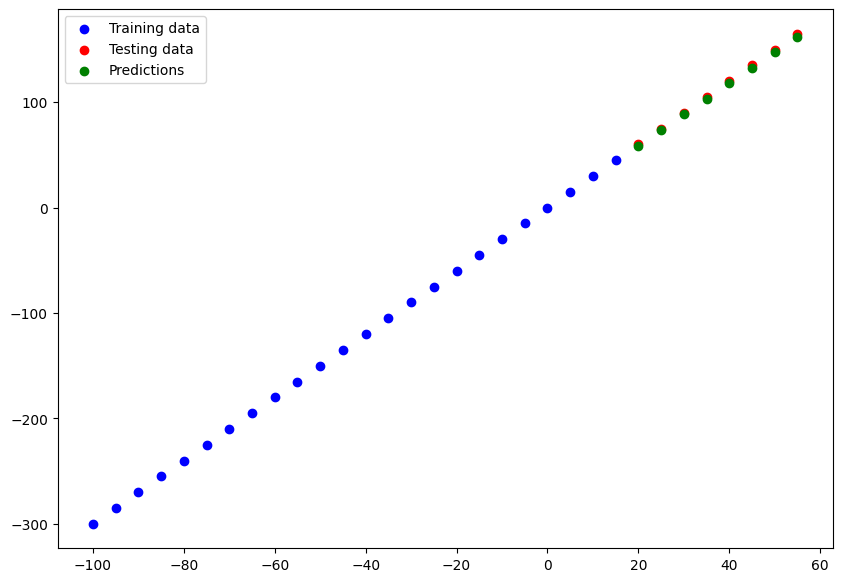

In [67]:
plot_predictions_data(test_data=X_val, test_labels=y_val, predictions=y_val_pred1)

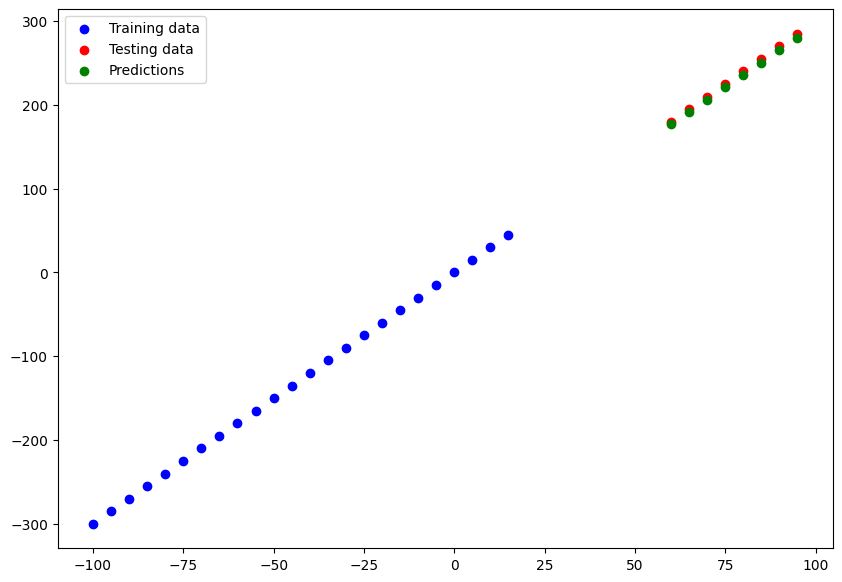

In [68]:
plot_predictions_data()

#Model_2

In [22]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(1,)))  # The input layer
model2.add(tf.keras.layers.Dense(100, activation='relu'))  # The hidden layer
model2.add(tf.keras.layers.Dense(100, activation='relu'))  # The hidden layer
model2.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model2.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 439ms/step - loss: 134.5096 - mae: 134.5096
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 114.1244 - mae: 114.1244
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 71.2225 - mae: 71.2225
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 99.4670 - mae: 99.4670
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 134.3006 - mae: 134.3006
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 130.9921 - mae: 130.9921
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 127.1365 - mae: 127.1365
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 119.3534 - mae: 119.3534
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 99.4583 - mae: 99.4583
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 35.2538 - mae: 35.2538
Epoch 11/200
1/1 [===================

In [23]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               200       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model2.predict([100])

1/1 [==============================] - 0s 361ms/step


array([[301.1692]], dtype=float32)

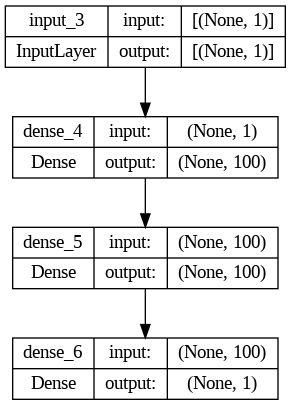

In [25]:
plot_model(model=model2, show_shapes=True)

In [44]:
y_val_pred2 = model2.predict(X_val)
y_pred_pred2 = model2.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [45]:
y_val_pred2_tensor = tf.squeeze(tf.constant(y_val_pred2))
y_pred_pred2_tensor = tf.squeeze(tf.constant(y_pred_pred2))
y_val_tensor2 = tf.squeeze(y_val)
y_test_tensor2 = tf.squeeze(y_test)

y_val_tensor2 = tf.cast(y_val_tensor2, dtype=tf.float32)
y_test_tensor2 = tf.cast(y_test_tensor2, dtype=tf.float32)

MAE:

In [46]:
print(mae(y_val_tensor2, y_val_pred2_tensor))
print(mae(y_test_tensor2, y_pred_pred2_tensor))

tf.Tensor(0.195436, shape=(), dtype=float32)
tf.Tensor(0.7306366, shape=(), dtype=float32)


In [69]:
mae_val_2 = mae(y_val_tensor2, y_val_pred2_tensor)
mae_test_2 = mae(y_test_tensor2, y_pred_pred2_tensor)

MSE:

In [47]:
print(mse(y_val_tensor2, y_val_pred2_tensor))
print(mse(y_test_tensor2, y_pred_pred2_tensor))

tf.Tensor(0.052542, shape=(), dtype=float32)
tf.Tensor(0.58369756, shape=(), dtype=float32)


In [70]:
mse_val_2 = mse(y_val_tensor2, y_val_pred2_tensor)
mse_test_2 = mse(y_test_tensor2, y_pred_pred2_tensor)

Huber:

In [49]:
print(huber(y_val_tensor2, y_val_pred2_tensor))
print(huber(y_test_tensor2, y_pred_pred2_tensor))

tf.Tensor(0.026271, shape=(), dtype=float32)
tf.Tensor(0.29152703, shape=(), dtype=float32)


In [71]:
huber_val_2 = huber(y_val_tensor2, y_val_pred2_tensor)
huber_test_2 = huber(y_test_tensor2, y_pred_pred2_tensor)

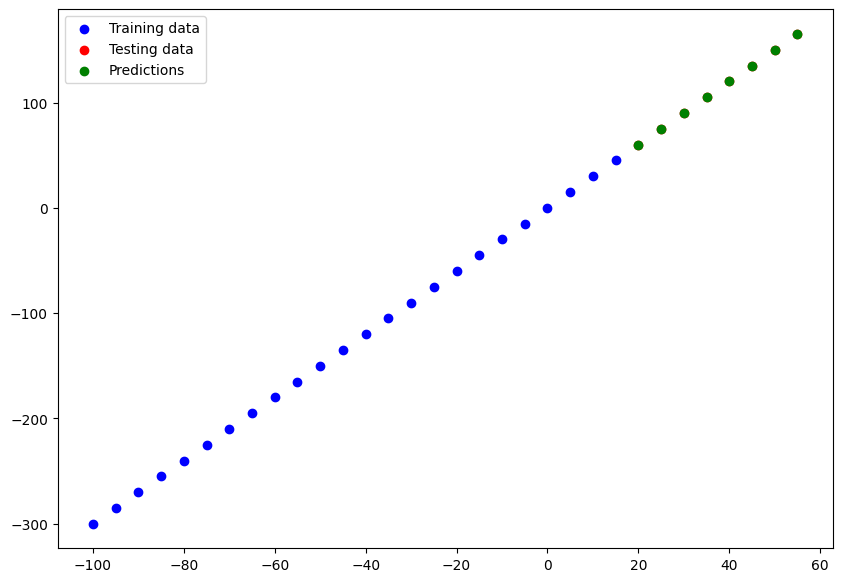

In [50]:
plot_predictions_data(test_data=X_val, test_labels=y_val, predictions=y_val_pred2)

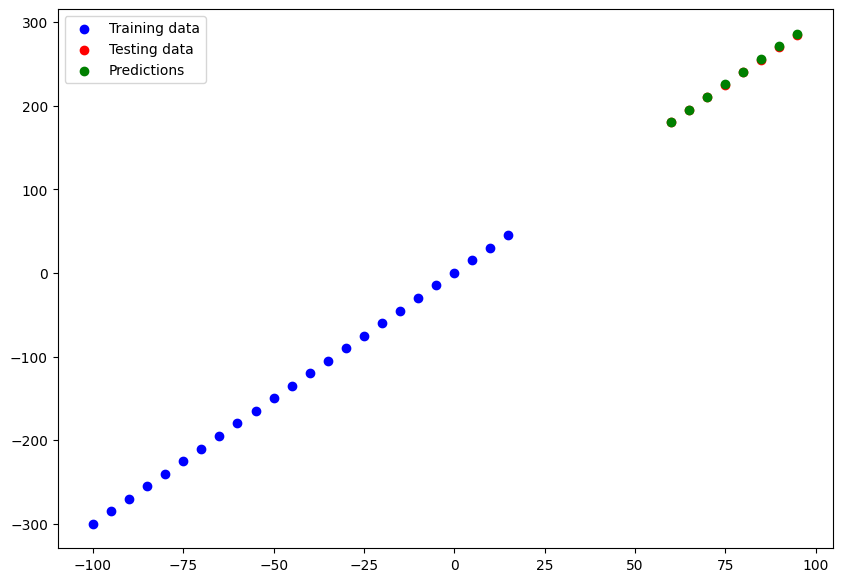

In [51]:
plot_predictions_data(predictions=y_pred_pred2)

#Model_3:

In [33]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(1,)))  # The input layer
model3.add(tf.keras.layers.Dense(100, activation='relu'))  # The hidden layer
model3.add(tf.keras.layers.Dense(100, activation='relu'))  # The hidden layer
model3.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model3.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model3.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 469ms/step - loss: 141.3885 - mae: 141.3885
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 113.1073 - mae: 113.1073
Epoch 3/500
1/1 [==============================] - 0s 16ms/step - loss: 69.6814 - mae: 69.6814
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 100.9915 - mae: 100.9915
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 132.6060 - mae: 132.6060
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 130.3739 - mae: 130.3739
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 126.6045 - mae: 126.6045
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 118.3897 - mae: 118.3897
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 97.2203 - mae: 97.2203
Epoch 10/500
1/1 [==============================] - 0s 14ms/step - loss: 27.7741 - mae: 27.7741
Epoch 11/500
1/1 [================

In [34]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


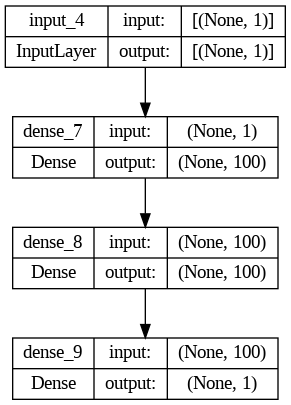

In [35]:
plot_model(model=model3, show_shapes=True)

In [52]:
y_val_pred3 = model3.predict(X_val)
y_pred_pred3 = model3.predict(X_test)

1/1 [==============================] - 0s 31ms/step


In [53]:
y_val_pred3_tensor = tf.squeeze(tf.constant(y_val_pred3))
y_pred_pred3_tensor = tf.squeeze(tf.constant(y_pred_pred3))
y_val_tensor3 = tf.squeeze(y_val)
y_test_tensor3 = tf.squeeze(y_test)

y_val_tensor3 = tf.cast(y_val_tensor3, dtype=tf.float32)
y_test_tensor3 = tf.cast(y_test_tensor3, dtype=tf.float32)

MAE:

In [54]:
print(mae(y_val_tensor3, y_val_pred3_tensor))
print(mae(y_test_tensor3, y_pred_pred3_tensor))

tf.Tensor(8.323164, shape=(), dtype=float32)
tf.Tensor(19.11071, shape=(), dtype=float32)


In [72]:
mae_val_3 = mae(y_val_tensor3, y_val_pred3_tensor)
mae_test_3 = mae(y_test_tensor3, y_pred_pred3_tensor)

MSE:

In [55]:
print(mse(y_val_tensor3, y_val_pred3_tensor))
print(mse(y_test_tensor3, y_pred_pred3_tensor))

tf.Tensor(78.83232, shape=(), dtype=float32)
tf.Tensor(374.7352, shape=(), dtype=float32)


In [73]:
mse_val_3 = mse(y_val_tensor3, y_val_pred3_tensor)
mse_test_3 = mse(y_test_tensor3, y_pred_pred3_tensor)

Huber:

In [56]:
print(huber(y_val_tensor3, y_val_pred3_tensor))
print(huber(y_test_tensor3, y_pred_pred3_tensor))

tf.Tensor(7.823164, shape=(), dtype=float32)
tf.Tensor(18.61071, shape=(), dtype=float32)


In [74]:
huber_val_3 = huber(y_val_tensor3, y_val_pred3_tensor)
huber_test_3 = huber(y_test_tensor3, y_pred_pred3_tensor)

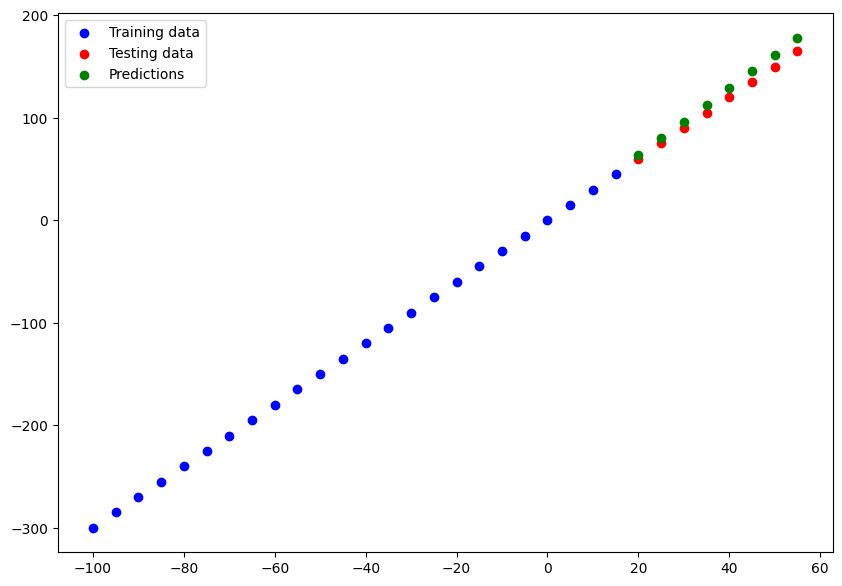

In [57]:
plot_predictions_data(test_data=X_val, test_labels=y_val, predictions=y_val_pred3)

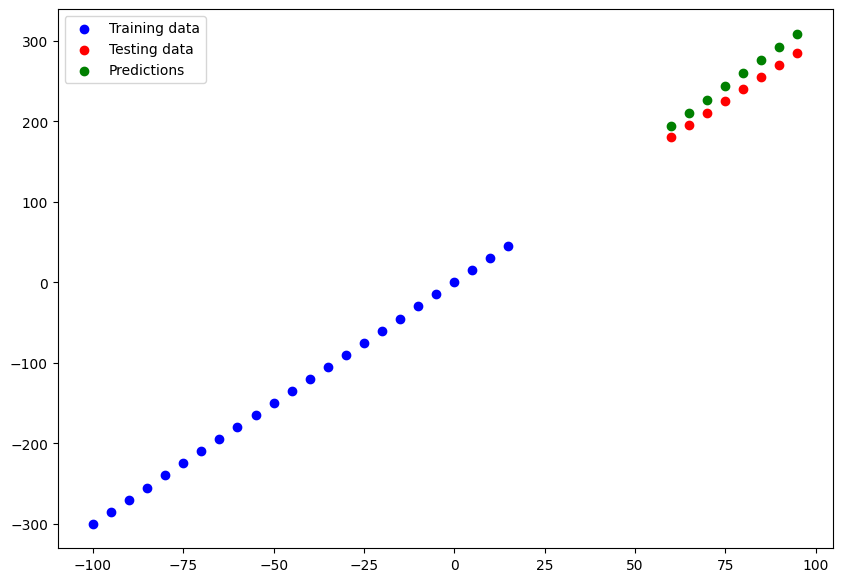

In [58]:
plot_predictions_data(predictions=y_pred_pred3)

You can try to build small experimental models and, if the work, increase the scale of the data when is necessary.

#Compare the results:

In [77]:
import pandas as pd

results = [
    ["model1_val", mae_val_1.numpy(), mse_val_1.numpy(), huber_val_1.numpy()],
    ["model1_test", mae_test_1.numpy(), mse_test_1.numpy(), huber_test_1.numpy()],
    ["model2_val", mae_val_2.numpy(), mse_val_2.numpy(), huber_val_2.numpy()],
    ["model2_test", mae_test_2.numpy(), mse_test_2.numpy(), huber_test_2.numpy()],
    ["model3_val", mae_val_3.numpy(), mse_val_3.numpy(), huber_val_3.numpy()],
    ["model3_test", mae_test_3.numpy(), mse_test_3.numpy(), huber_test_3.numpy()]
]

all_results = pd.DataFrame(results, columns=["model", "mae", "mse", "huber"])
all_results

,model,mae,mse,huber
0,model1_val,1.961705,4.202275,1.461705
1,model1_test,4.039167,16.668978,3.539167
2,model2_val,0.195436,0.052542,0.026271
3,model2_test,0.730637,0.583698,0.291527
4,model3_val,8.323164,78.832321,7.823164
5,model3_test,19.110710,374.735199,18.610710


We need to minimize the time between the experiments. More experiments imply a better understanding of the problems.

Good practice: Track the results of the experiments.
* TensorBoard - A component of TensorFlow library for tracking modelling experiments.
* Weights and Biases - A tool for tracking all kinds of ML experiments.